In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def greedyCoreset(data_points, k):
    n=data_points.shape[0]
    coreset = []
    coreset.append(data_points[np.random.choice(n)])
    while len(coreset)<k:
        max_min_dist = -1
        best_point = None
        
        for point in data_points:
            if not any(np.array_equal(point, p) for p in coreset):
                min_dist=np.min(np.linalg.norm(point - np.array(coreset), axis=1))
                
                if min_dist>max_min_dist:
                    max_min_dist=min_dist
                    best_point=point
                    
        coreset.append(best_point)
        
    coreset=np.array(coreset)
    return coreset

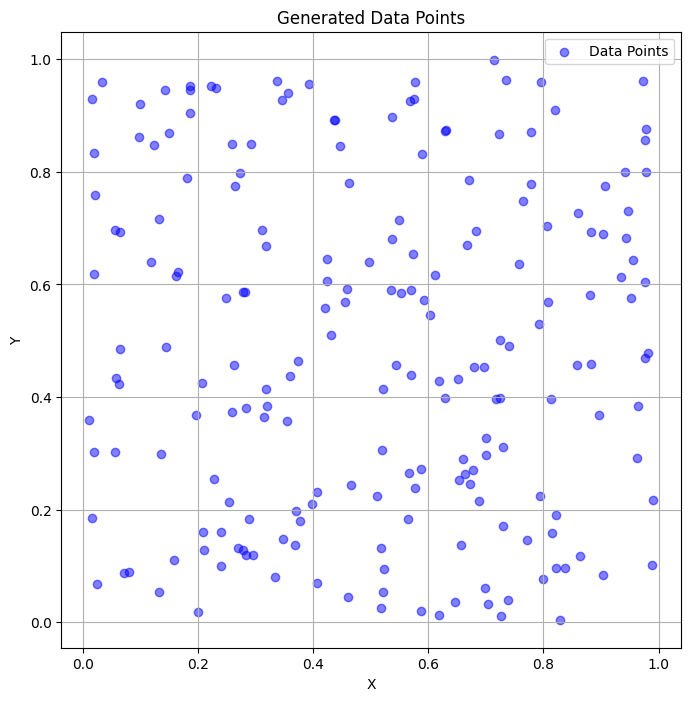

In [14]:
np.random.seed(0)
num_points = 200
data_points = np.random.rand(num_points, 2)

plt.figure(figsize=(8, 8))
plt.scatter(data_points[:, 0], data_points[:, 1], c='b', alpha=0.5, label='Data Points')
plt.title('Generated Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

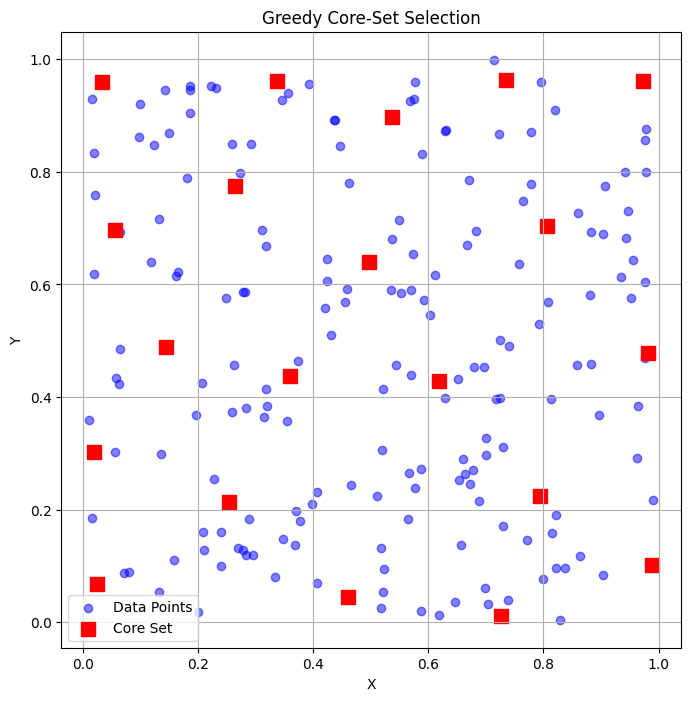

Shape of core-set: (20, 2)


In [15]:
core_set_size = 20
core_set = greedyCoreset(data_points, core_set_size)

plt.figure(figsize=(8, 8))
plt.scatter(data_points[:, 0], data_points[:, 1], c='b', alpha=0.5, label='Data Points')
plt.scatter(core_set[:, 0], core_set[:, 1], c='r', marker='s', s=100, label='Core Set')
plt.title('Greedy Core-Set Selection')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Shape of core-set:", core_set.shape)

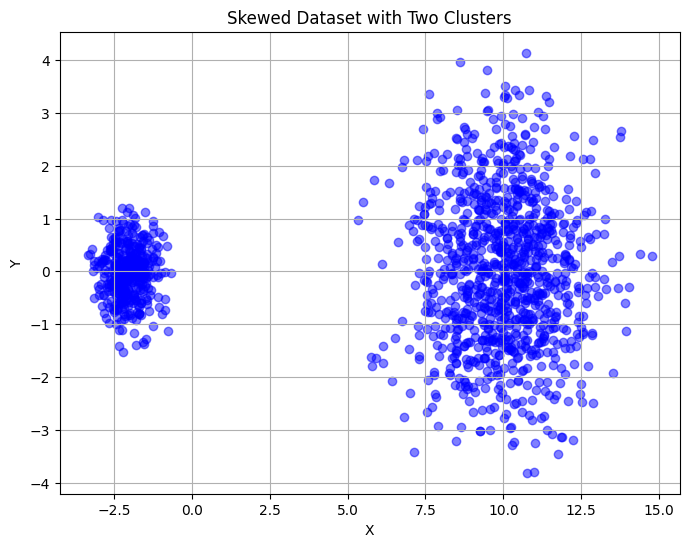

In [18]:
from sklearn.datasets import make_blobs

np.random.seed(0)

# Parameters for the skewed dataset
centers = [[-2, 0], [10, 0]]
cluster_std = [0.5, 1.5]
num_samples = [400, 1000]  # Number of samples in each cluster

# Generate the skewed dataset using make_blobs
X_skewed, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, random_state=0)

# Visualize the skewed dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_skewed[:, 0], X_skewed[:, 1], c='b', alpha=0.5)
plt.title('Skewed Dataset with Two Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

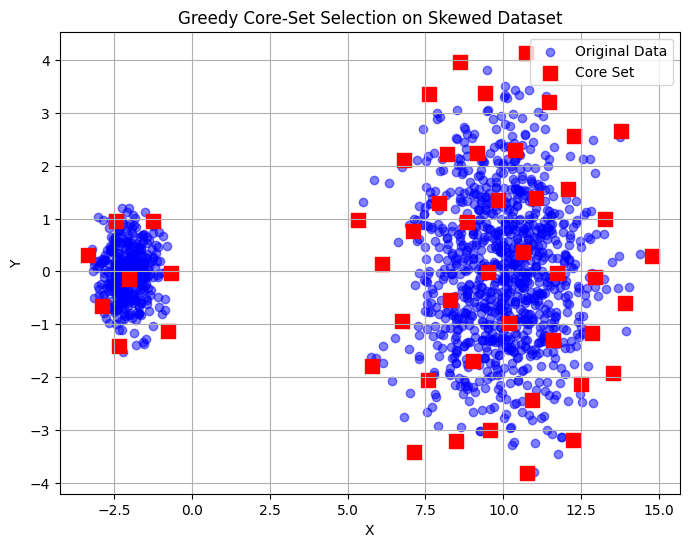

Shape of core-set: (50, 2)


In [19]:
core_set_size = 50

# Apply the greedy core-set selection algorithm to the skewed dataset
core_set_skewed = greedyCoreset(X_skewed, core_set_size)

# Visualize the core-set along with the original skewed dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_skewed[:, 0], X_skewed[:, 1], c='b', alpha=0.5, label='Original Data')
plt.scatter(core_set_skewed[:, 0], core_set_skewed[:, 1], c='r', marker='s', s=100, label='Core Set')
plt.title('Greedy Core-Set Selection on Skewed Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Shape of core-set:", core_set_skewed.shape)

In [20]:
class MLP():
    def __init__(self, data_points):
        self.data_points = data_points

In [46]:
def compute_weights_probab(data_points, m):
    n=data_points.shape[0]
    mean_point = np.mean(data_points, axis=0) 
    
    distances_to_mean = np.linalg.norm(data_points - mean_point, axis=1)**2
    sum_distances_to_mean = np.sum(distances_to_mean)
    
    probabilities = (1 / (2 * n)) + (distances_to_mean / (2 * sum_distances_to_mean))

    weights = 1 / (m * probabilities)

    return weights, probabilities

def sample_weighted_points(data_points, probabilities, m):
    n=data_points.shape[0]

    sampled_indices = np.random.choice(n, size=m, p=probabilities/np.sum(probabilities))
    coreset = data_points[sampled_indices]

    return coreset

def lightweight_coreset(data_points, m):
    weights=compute_weights_probab(data_points, m)[0]
    coreset=sample_weighted_points(data_points, weights, m)
    
    return coreset, weights

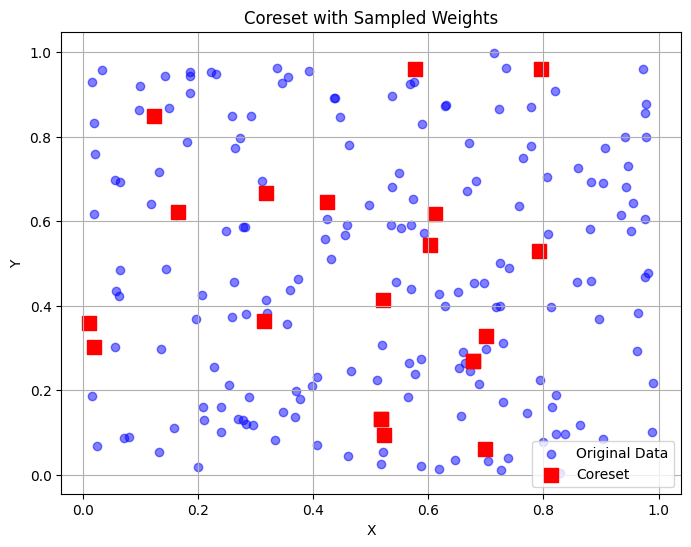

Shape of coreset: (20, 2)
Sampled weights: [15.06690885 18.56853899 16.73271371  9.90960137  8.63189194 13.33266421
  9.15499177  6.47973366  6.37174983  8.58292173  6.83019701 13.03652979
  9.77789078  6.54890011 19.38954843 10.80938529 18.93322197  7.90749326
 17.08062639  8.40673337 17.49663651  8.68196581 14.70334745  8.74634197
 15.30169893 19.27362509  6.10676528  9.2597649  13.76996174 14.7301627
  7.79343226 10.76415911 12.07402757  8.00588267  7.78650286  8.59291088
  8.28834257  7.93810404  9.52844341  9.65823425 16.09291185  8.23485109
 15.24238834 10.41342173  9.04796059 14.18758482  9.25851236 10.93211945
  8.55872877  6.64449596 13.74792522  7.47046484 13.82376648 18.35918553
  7.16835388 11.0973311  13.9293685  12.38672184 10.53895125  9.51175054
 15.51374326  8.45964773 17.72405713  7.61984572 14.58894425 18.27843684
  9.83263024 18.33111703 16.71410687 17.4658159  10.01617245  9.8989688
 10.95472886  6.41467536  7.04239036  7.57214017 11.05044539  7.5048548
 12.6137373

In [47]:
np.random.seed(0)
num_points = 200
data_points = np.random.rand(num_points, 2)

# Set the desired size of the coreset
m = 20

# Compute weights and probabilities
coreset, weights = lightweight_coreset(data_points, m)

# Visualize the constructed coreset along with the original data points
plt.figure(figsize=(8, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c='b', alpha=0.5, label='Original Data')
plt.scatter(coreset[:, 0], coreset[:, 1], c='r', marker='s', s=100, label='Coreset')
plt.title('Coreset with Sampled Weights')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Shape of coreset:", coreset.shape)
print("Sampled weights:", weights)

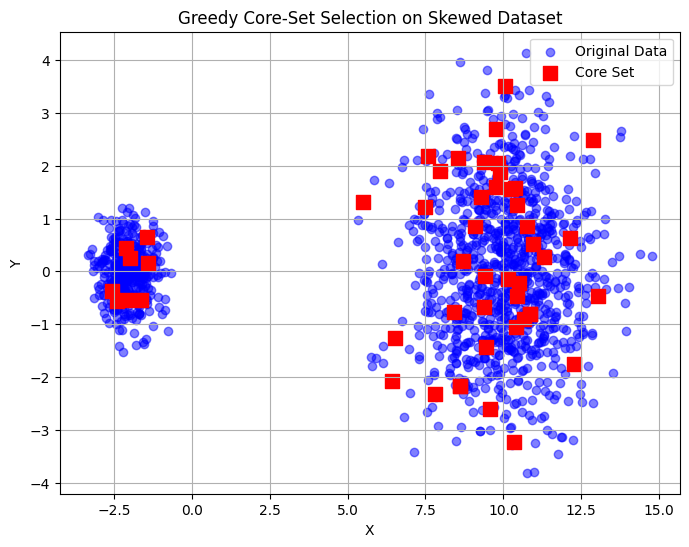

Shape of core-set: (50, 2)


In [51]:
core_set_size = 50

# Apply the greedy core-set selection algorithm to the skewed dataset
core_set_skewed = lightweight_coreset(X_skewed, core_set_size)

# Visualize the core-set along with the original skewed dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_skewed[:, 0], X_skewed[:, 1], c='b', alpha=0.5, label='Original Data')
plt.scatter(core_set_skewed[0][:, 0], core_set_skewed[0][:, 1], c='r', marker='s', s=100, label='Core Set')
plt.title('Greedy Core-Set Selection on Skewed Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Shape of core-set:", core_set_skewed[0].shape)

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

torch.manual_seed(0)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# def train_and_evaluate_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
#     for epoch in range(num_epochs):
#         model.train()
#         for inputs, labels in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
        
#         model.eval()
#         val_correct = 0
#         val_total = 0
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs, 1)
#             val_correct += (predicted == labels).sum().item()
#             val_total += labels.size(0)
        
#         val_accuracy = val_correct / val_total
#         print(f"Epoch {epoch + 1}, Validation Accuracy: {val_accuracy:.4f}")

def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
        
def train_model2(model, train_loader, criterion, optimizer, num_epochs=5):
    # Assuming `train_loader` is set up to load Fashion MNIST data
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            # Reshape images to [batch_size, 1, 28, 28]
            images = images.view(-1, 1, 28, 28)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(images)
            
            # Compute loss
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')


In [53]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:14<00:00, 1849734.28it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 29608917.14it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1488138.48it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5155749.04it/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Training on Full Fashion MNIST Dataset:
Epoch 1, Validation Accuracy: 0.8870
Epoch 2, Validation Accuracy: 0.8984
Epoch 3, Validation Accuracy: 0.9048
Epoch 4, Validation Accuracy: 0.9116
Epoch 5, Validation Accuracy: 0.9151


In [72]:
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

model_full = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_full.parameters(), lr=0.001)

print("Training on Full Fashion MNIST Dataset:")
# train_and_evaluate_model(model, train_loader, val_loader, criterion, optimizer)
# Train the model on the full dataset
train_model(model_full, train_loader, criterion, optimizer)


Training on Full Fashion MNIST Dataset:
Epoch [1/5], Loss: 0.5615
Epoch [2/5], Loss: 0.3498
Epoch [3/5], Loss: 0.2941
Epoch [4/5], Loss: 0.2604
Epoch [5/5], Loss: 0.2298


In [90]:
print(np.array(train_data).shape)

C:\Users\AYUSH MODI\AppData\Local\Temp\ipykernel_21636\1006256882.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  print(np.array(train_data).shape)


(24576, 2)


C:\Users\AYUSH MODI\AppData\Local\Temp\ipykernel_21636\1006256882.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(train_data).shape)


In [91]:
print(train_loader)

In [92]:
# Extract a subset of data_points from the Fashion MNIST dataset
data_points = []
for images, labels in train_loader:
    flattened_images = images.view(images.size(0), -1).numpy()
    data_points.extend(flattened_images)

data_points = np.array(data_points)  # Convert to numpy array
print(data_points.shape)

(24576, 784)


In [78]:
def greedyCoreset2(data_points, k):
    n = data_points.shape[0]
    coreset = []
    coreset.append(data_points[np.random.choice(n)])

    while len(coreset) < k:
        max_min_dist = -1
        best_point = None
        
        for point in data_points:
            if not any(np.array_equal(point, p) for p in coreset):
                # Compute minimum distance from 'point' to any point in 'coreset'
                min_dist = np.min(np.linalg.norm(point - np.array(coreset), axis=1))
                
                if min_dist > max_min_dist:
                    max_min_dist = min_dist
                    best_point = point
        
        coreset.append(best_point)
    
    coreset = np.array(coreset)
    return coreset

In [80]:
import numpy as np
from scipy.spatial.distance import cdist

def greedyCoreset3(data_points, k):
    n = data_points.shape[0]
    coreset = []
    coreset.append(data_points[np.random.choice(n)])

    while len(coreset) < k:
        # Compute distances between data_points and current coreset
        distances = cdist(data_points, np.array(coreset))
        
        # Find the point with maximum minimum distance to any point in coreset
        min_distances_to_coreset = np.min(distances, axis=1)
        max_min_dist_index = np.argmax(min_distances_to_coreset)
        best_point = data_points[max_min_dist_index]
        
        coreset.append(best_point)
    
    coreset = np.array(coreset)
    return coreset

In [81]:
# Generate coreset using greedyCoreset function
k = 100  # Example: Set the number of points in the coreset
print("Coreset Generation Started:")
coreset = greedyCoreset3(data_points, k)
print("Coreset Generation Done")

Coreset Generation Started:
Coreset Generation Done
Training on coreset:


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [64, 784]

In [94]:
# Convert coreset to DataLoader for training
coreset_dataset = torch.utils.data.TensorDataset(torch.tensor(coreset), torch.zeros(coreset.shape[0], dtype=torch.long))
coreset_loader = torch.utils.data.DataLoader(coreset_dataset, batch_size=64, shuffle=True)

# Train the model on the coreset
model_coreset = CNN()
optimizer_coreset = optim.Adam(model_coreset.parameters(), lr=0.001)

print("Training on coreset:")
train_model2(model_coreset, coreset_loader, criterion, optimizer_coreset)

Training on coreset:
Epoch [1/5], Loss: 1.7218
Epoch [2/5], Loss: 0.1126
Epoch [3/5], Loss: 0.0002
Epoch [4/5], Loss: 0.0000
Epoch [5/5], Loss: 0.0000


In [93]:
print(coreset.shape)

(100, 784)


In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Evaluate the model trained on the full dataset
accuracy_full = evaluate_model(model_full, test_loader)
print(f'Accuracy on full dataset: {accuracy_full:.2f}')

# Evaluate the model trained on the coreset
accuracy_coreset = evaluate_model(model_coreset, test_loader)
print(f'Accuracy on coreset: {accuracy_coreset:.2f}')

In [69]:
# train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
# val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
# test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# model = CNN()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# print("Training on Full Fashion MNIST Dataset:")
# train_and_evaluate_model(model, train_loader, val_loader, criterion, optimizer)

Training on Full Fashion MNIST Dataset:
Epoch 1, Validation Accuracy: 0.8626
Epoch 2, Validation Accuracy: 0.8798
Epoch 3, Validation Accuracy: 0.8973
Epoch 4, Validation Accuracy: 0.9012
Epoch 5, Validation Accuracy: 0.8936


In [67]:
# # Convert Greedy Coreset indices to a subset of the training data
# k = 1000
# greedy_coreset_indices = greedyCoreset(train_indices, train_data.data.numpy().reshape(-1, 28*28), k)
# greedy_coreset_images = train_data.data[greedy_coreset_indices]
# greedy_coreset_labels = train_data.targets[greedy_coreset_indices]

# # Create data loader for the Greedy Coreset
# coreset_loader = DataLoader(TensorDataset(greedy_coreset_images.unsqueeze(1) / 255.0, greedy_coreset_labels),
#                             batch_size=64, shuffle=True)

# # Define CNN model, criterion, and optimizer
# model = CNN()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

AttributeError: 'list' object has no attribute 'data'

In [64]:
# print((train_data))

KeyboardInterrupt: 

In [65]:
# k = 1000
# greedy_coreset_indices = greedyCoreset(train_data.data.numpy().reshape(-1, 28*28), k)
# greedy_coreset_images = train_data.data.numpy()[greedy_coreset_indices]
# greedy_coreset_labels = train_data.targets.numpy()[greedy_coreset_indices]

# # Create data loader for the Greedy Coreset
# coreset_loader = DataLoader(TensorDataset(torch.Tensor(greedy_coreset_images).unsqueeze(1) / 255.0, torch.LongTensor(greedy_coreset_labels)),
#                             batch_size=64, shuffle=True)

# # Train and evaluate the model on the Greedy Coreset
# print("\nTraining on Greedy Coreset:")
# model = CNN()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# train_and_evaluate_model(model, coreset_loader, val_loader, criterion, optimizer)

AttributeError: 'list' object has no attribute 'data'